In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
class general_plots:
    def __init__(self, nb_rows_col=[1,1], fig_size = (7,7)):
        self.nb_rows    = nb_rows_col[0]
        self.nb_col     = nb_rows_col[1]
        self.nb_plot    = self.nb_rows * self.nb_col
        self.fig_size   = fig_size
        self.count_plot = 0
        #self.fig_name = "Plot"

    def line(self, data, col_list, xlim = [0,10], ylim=[0,10], xlabel = 'X', ylabel = 'Y'):
    
        x, y = self._get_components(data, col_list)

        # Single plot
        if self.nb_plot == 1:
            fig, ax = plt.subplots(self.nb_rows, self.nb_col, figsize=self.fig_size)

            ax.set(xlim=xlim, ylim=ylim, xlabel=xlabel, ylabel=ylabel)
            ax.plot(x, y, c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
            ax.grid(linestyle=':', linewidth =1, alpha=0.5)
            ax.hlines(y = 1, xmin = 0, xmax = 4, color='green', linestyle=':', linewidth =3) 
            ax.vlines(x = 1, ymin = 0, ymax = 4, color='pink', linestyle='--', linewidth =3) 
            ax.tick_params(axis="x", labelsize=13)
            ax.tick_params(axis="y", labelsize=13)
            ax.set_xlabel('X', fontsize=18)
            ax.set_ylabel('Y', fontsize=18)
            ax.legend(loc=4, ncol=1, framealpha=0.7, title='legend', markerscale=0.3)
            plt.show()
        
        # Multiple plots
        else:
            if self.count_plot == 0:
                self.xs, self.ys = [x],[y]
                self.xlims, self.ylims = [xlim],[ylim]
                self.xlabels, self.ylabels = [xlabel],[ylabel]
                self.count_plot = self.count_plot + 1
            else:
                self.xs.append(x)
                self.ys.append(y)
                self.xlims.append(xlim)
                self.ylims.append(ylim)
                self.xlabels.append(xlabel)
                self.ylabels.append(ylabel)
                self.count_plot = self.count_plot + 1
                if self.count_plot == self.nb_plot:
                    self._plot_grid()
                
    


    def _plot_grid(self):
        fig, axs = plt.subplots(self.nb_rows, self.nb_col, figsize=self.fig_size)
        if self.nb_rows == 1:
            for col in range(self.nb_col):
                axs[col].set(xlim=self.xlims[col], ylim=self.ylims[col], xlabel=self.xlabels[col], ylabel=self.ylabels[col])
                axs[col].plot(self.xs[col], self.ys[col], c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
            fig.show()
        else:
            count = 0
            for row in range(self.nb_rows):
                for col in range(self.nb_col):
                    axs[row,col].set(xlim=self.xlims[count], ylim=self.ylims[count],xlabel=self.xlabels[count], ylabel=self.ylabels[count])
                    axs[row,col].plot(self.xs[count], self.ys[count], c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
                    count = count + 1
            fig.show()
                


    def _get_components(self, data, col_list):
        # Dataframe
        if type(data) == pd.core.frame.DataFrame:
            if all(type(elem) == int for elem in col_list) == True:
                x = data.iloc[:,col_list[0]]
                y = data.iloc[:,col_list[1]]
            elif all(type(elem) == str for elem in col_list) == True:
                x = data.loc[:,col_list[0]]
                y = data.loc[:,col_list[1]]
            else:
                print('Error: the column list is not well-specified')
        # Array or list
        elif type(data) == np.ndarray or type(data) == list:
            # List of tuples
            if all(isinstance(item, tuple) for item in data):
                x = [i[col_list[0]] for i in data]
                y = [i[col_list[1]] for i in data]
            else:
                x = data[:,col_list[0]]
                y = data[:,col_list[1]]
        # Tuple
        elif type(data) == tuple:
            x = [i[col_list[0]] for i in data]
            y = [i[col_list[1]] for i in data]
        else:
            sys.exit('The data format is not recognized')
        return x, y

    
    def load_data(self):
        
        return 0

    def save_fig(self):
        print("save")
        return 

### Data

In [21]:
x  = np.linspace(0, 10, 1000)
y1 = np.cos(x)
y2 = np.tan(x)
y3 = np.sin(x)

data = list([x, y1, y2, y3])
data = np.transpose(data)
dd = pd.DataFrame(data, columns=['x', 'cos', 'tan', 'sin'])

### Create object and call methods:

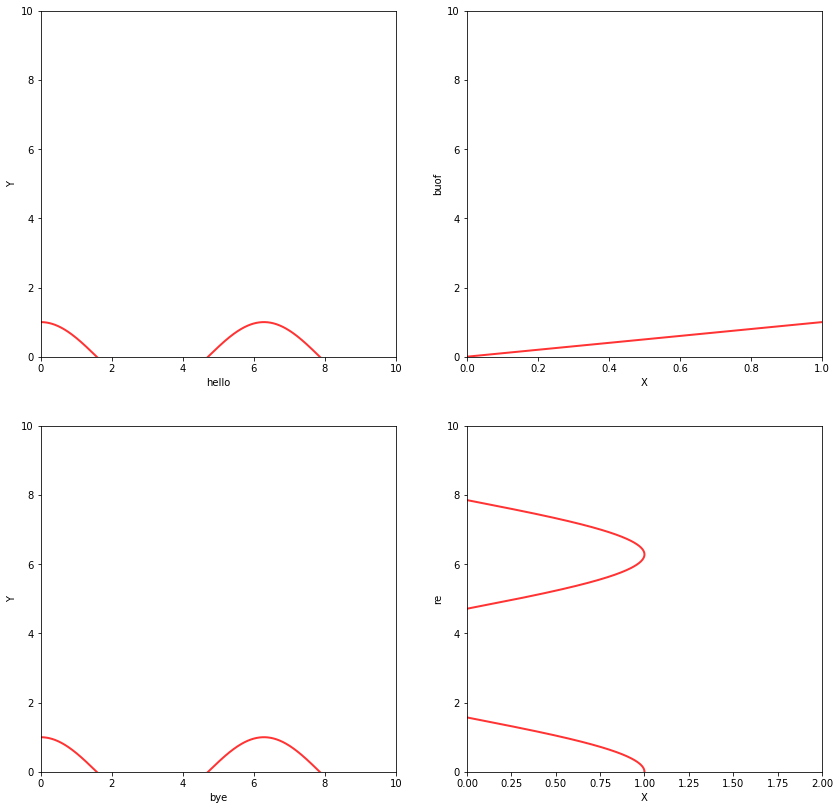

In [24]:
nb_rows_col = (2,2)
figsize     = (14,14)

c = general_plots(nb_rows_col, figsize)

c.line(data, col_list=[0,1], xlabel='hello')
c.line(dd, col_list=['x','x'], xlim=[0,1], ylabel='buof')
c.line(data, col_list=[0,1], xlabel='bye')
c.line(dd, col_list=['cos','x'], xlim=[0,2], ylabel='re')